# Инициализация проекта

In [577]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [578]:

data= pd.read_csv('../data/diamonds.csv')
data = data.drop(columns = ["Unnamed: 0"])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

- `carat` — вес бриллианта в каратах
- `cut` — качество огранки
- `color` — цвет 
- `clarity` - чистота 
- `depth` - общая глубина в процентах
- `table` - площадь - ширина верхней точки относительно самой широкой точки
- `price` — цена
- `x` - длина
- `y` - ширина
- `z` - высота
</font>

In [579]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  str    
 2   color    53940 non-null  str    
 3   clarity  53940 non-null  str    
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), str(3)
memory usage: 4.1 MB


In [580]:
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<font size=4><b>Получили следующую характеристику исходных данных:</b>

- столбцов с пропушенными столбцами нет
- солбцы `cut`, `color`, `clarity` представлены str - требуют обработки
- столбец `price` - int32
- остальные float64
</font>

## Коррекция типов данных

In [581]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  str    
 2   color    53940 non-null  str    
 3   clarity  53940 non-null  str    
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), str(3)
memory usage: 4.1 MB


In [582]:
data["carat"] = data["carat"].astype("float32")
data["depth"] = data["depth"].astype("float32")
data["table"] = data["table"].astype("int32")
data["z"] = data["z"].astype("float32")
data["x"] = data["x"].astype("float32")
data["y"] = data["y"].astype("float32")
data["price"] = data["price"].astype("int32")

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.799999,57,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.099998,55,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.799999,60,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.000000,58,2757,6.15,6.12,3.74


In [583]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float32
 1   cut      53940 non-null  str    
 2   color    53940 non-null  str    
 3   clarity  53940 non-null  str    
 4   depth    53940 non-null  float32
 5   table    53940 non-null  int32  
 6   price    53940 non-null  int32  
 7   x        53940 non-null  float32
 8   y        53940 non-null  float32
 9   z        53940 non-null  float32
dtypes: float32(5), int32(2), str(3)
memory usage: 2.7 MB


In [584]:
data["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [585]:
data["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [586]:
data["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [587]:
dict_cut = {'Ideal': 4,
             'Premium': 3,
             'Very Good': 2,
             'Good': 1,
             'Fair': 0}

dict_color = {'D': 6,
             'E': 5,
             'F': 4,
             'G': 3,
             'H': 2,
             'I': 1,
             'J': 0}

dict_clarity = {'IF': 7,
                'VVS1': 6,
                'VVS2': 5,
                'VS1': 4,
                'VS2': 3,
                'SI1': 2,
                'SI2': 1,
                'I1': 0}

In [588]:
data['cut'] = data['cut'].map(dict_cut).astype("int32")
data['color'] = data['color'].map(dict_color).astype("int32")
data['clarity'] = data['clarity'].map(dict_clarity).astype("int32")

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.500000,55,326,3.95,3.98,2.43
1,0.21,3,5,2,59.799999,61,326,3.89,3.84,2.31
2,0.23,1,5,4,56.900002,65,327,4.05,4.07,2.31
3,0.29,3,1,3,62.400002,58,334,4.20,4.23,2.63
4,0.31,1,0,1,63.299999,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.799999,57,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.099998,55,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.799999,60,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.000000,58,2757,6.15,6.12,3.74


In [589]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float32
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float32
 5   table    53940 non-null  int32  
 6   price    53940 non-null  int32  
 7   x        53940 non-null  float32
 8   y        53940 non-null  float32
 9   z        53940 non-null  float32
dtypes: float32(5), int32(5)
memory usage: 2.1 MB


In [590]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.448665,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.239779,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.799999,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900002,31.799999


# EDA

## Исследование основных параметров алмазов

Параметры:
- вес
- качество огранки
- цвет
- чистота 
- общая глубина

In [591]:
columns = ['carat','cut','color','clarity','depth']
data.describe()[columns]

,carat,cut,color,clarity,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405
std,0.474011,1.116600,1.701105,1.647136,1.432621
min,0.200000,0.000000,0.000000,0.000000,43.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000
50%,0.700000,3.000000,3.000000,3.000000,61.799999
75%,1.040000,4.000000,5.000000,4.000000,62.500000
max,5.010000,4.000000,6.000000,7.000000,79.000000


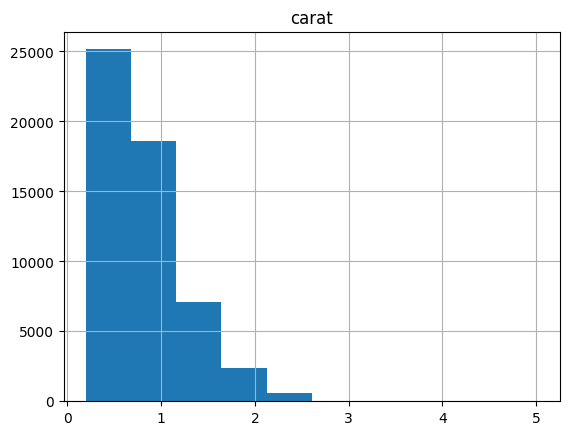

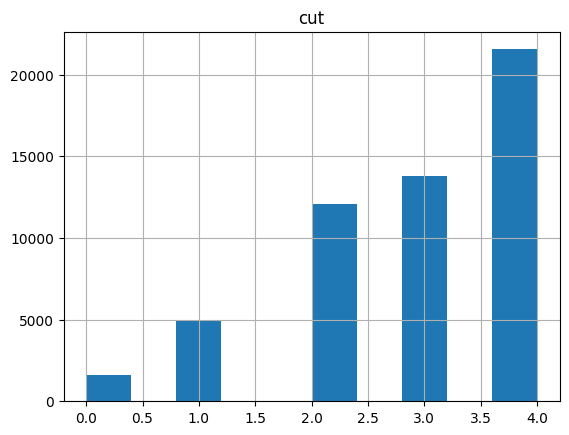

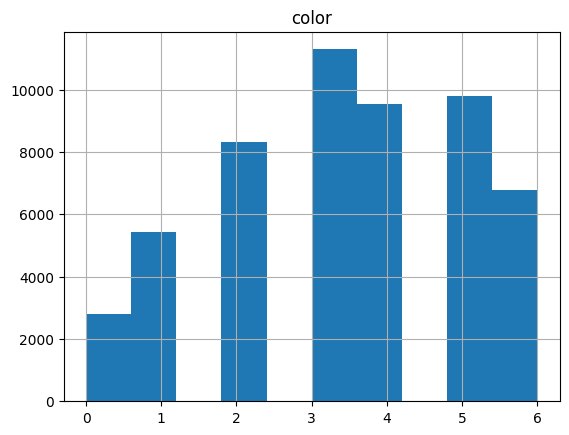

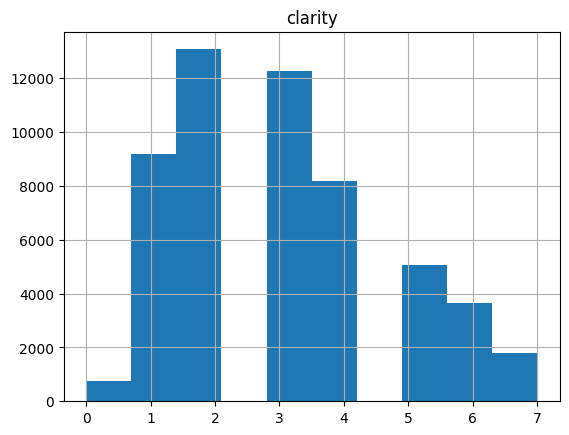

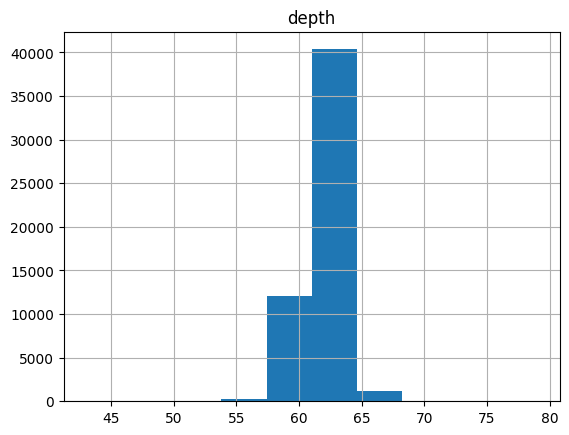

In [592]:
for column in columns:
    data.hist(column)